In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# reading files

In [2]:
data = pd.read_csv("C:/Users/Kaige Zhang/Desktop/t2.csv")

In [62]:
data

,Date,Hour,Minute,Sec,GridVoltage,Id
0,2019-01-09,23,41,52,243,94
1,2019-01-09,23,42,52,243,94
2,2019-01-09,23,43,52,243,94
3,2019-01-09,23,44,52,243,94
4,2019-01-09,23,45,52,243,94
5,2019-01-09,23,46,52,243,94
6,2019-01-09,23,47,53,243,94
7,2019-01-09,23,48,52,243,94
8,2019-01-09,23,49,52,242,94
9,2019-01-09,23,50,52,242,94


In [63]:
data.dtypes

Date           object
Hour            int64
Minute          int64
Sec             int64
GridVoltage     int64
Id              int64
dtype: object

In [4]:
data.shape

(10470613, 14)

# group  by date

In [5]:
data = data.drop(['GenerationCurrent'], axis = 1)
data = data.drop(['GenerationImportEnergy'], axis = 1)
data = data.drop(['GenerationExportEnergy'], axis = 1)
data = data.drop(['Impedance'], axis = 1)
data = data.drop(['PowerFactor'], axis = 1)
data = data.drop(['GridExportEnergy'], axis = 1)
data = data.drop(['GridImportEnergy'], axis = 1)
data = data.drop(['GridCurrent'], axis = 1)

In [6]:
data.head(5)

,Date,Hour,Minute,Sec,GridVoltage,Id
0,2019-01-09,23,41,52,243,94
1,2019-01-09,23,42,52,243,94
2,2019-01-09,23,43,52,243,94
3,2019-01-09,23,44,52,243,94
4,2019-01-09,23,45,52,243,94


In [7]:
weekday_data1 =  data[data['Date'] >= '2019-02-25']
weekday_data2 = data[data['Date'] <= '2019-02-25']
# 取并集
weekday_data = pd.merge (weekday_data1,weekday_data2,on=['Id', 'Date', 'Hour', 'Minute', 'Sec', 'GridVoltage'])
weekday_data = weekday_data.groupby(['Id','Date','Hour','Minute']).mean()
weekday_data = weekday_data.reset_index()

In [8]:
weekday_data.head()

,Id,Date,Hour,Minute,Sec,GridVoltage
0,6,2019-02-25,0,0,40.0,244.0
1,6,2019-02-25,0,1,37.0,244.0
2,6,2019-02-25,0,2,37.0,244.0
3,6,2019-02-25,0,3,37.0,244.0
4,6,2019-02-25,0,4,38.0,245.0


In [9]:
Hour_list = weekday_data['Hour'].drop_duplicates().tolist()

In [10]:
date_list = weekday_data['Date'].drop_duplicates().tolist()

In [11]:
id_list = weekday_data['Id'].drop_duplicates().tolist()

In [12]:
id_list

[6,
 9,
 11,
 13,
 19,
 23,
 27,
 28,
 30,
 35,
 37,
 38,
 42,
 44,
 48,
 51,
 53,
 56,
 58,
 60,
 65,
 67,
 69,
 71,
 73,
 74,
 77,
 80,
 82,
 83,
 84,
 86,
 90,
 94,
 95,
 97,
 101]

In [13]:
# 创建一个新的空的datafram， 分段 10min
ten_minutes = pd.DataFrame(columns = ['Id','Segment', 'GridVoltage'])
ten_minutes.head()


for i in range(len(id_list)):
    segment = 0 
    for d in range(len(date_list)):
        print(i,d)
        tem = weekday_data[weekday_data['Date'] == date_list[d]]
#         print(tem)
        temp = tem[tem['Id'] == id_list[i]]
        for k in range(len(Hour_list)):
            # 找出一个小时的
            temp2 = temp[temp['Hour']== Hour_list[k]]
    #         print(temp2)
            # 每个小时6个10min
            for j in range(6):  
                rows = temp2.loc[(temp2['Minute'] >= j * 10) & (temp2['Minute'] < (j + 1) * 10)]
#                 print(rows)
                avg = rows['GridVoltage'].mean()
        #         print(avg)

                row = {'Id':id_list[i], 'Segment':segment, 'GridVoltage':avg}
                segment += 1
    #             print(row)
                ten_minutes = ten_minutes.append([row], ignore_index=True)
        #         print(ten_minutes)

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0


In [65]:
ten_minutes.head()

,Id,Segment,GridVoltage
0,6,0,244.900000
1,6,1,246.611111
2,6,2,246.800000
3,6,3,246.700000
4,6,4,246.800000


In [15]:
ten_minutes.shape

(5328, 3)

In [16]:
#  ten_minutes.drop(ten_minutes.columns[len(ten_minutes.columns)-1], axis=1, inplace=True)

In [17]:
# find Na
nan = ten_minutes[ten_minutes.isnull().T.any()]
null_list = nan['Segment'].drop_duplicates().tolist()

In [18]:
tm = ten_minutes

In [19]:
for i in range(len(null_list)):
    ten_minutes = ten_minutes[~ten_minutes['Segment'].isin([null_list[i]])]

In [20]:
ten_minutes.shape

(5328, 3)

In [21]:
col = ['Id']
col += [x for x in range(144)]

data_ten_minutes = pd.DataFrame(columns = col)
for i in range(len(id_list)):
    temp = ten_minutes[ten_minutes['Id'] == id_list[i]]
    vol = temp['GridVoltage'].tolist()
#     vol.insert(0, id_list[i])
#     print(len(vol))
    row = {'Id':id_list[i]}
    for i in range(len(vol)):
        row[i] = vol[i]
#     print(row)
    data_ten_minutes = data_ten_minutes.append([row], ignore_index=True)
    

In [22]:
data_ten_minutes = data_ten_minutes.drop(labels=16, axis=0)
data_ten_minutes = data_ten_minutes.drop(labels=5, axis=0)
id_list = data_ten_minutes['Id'].drop_duplicates().tolist()
data_ten_minutes.head(37)

,Id,0,1,2,3,4,5,6,7,8,...,134,135,136,137,138,139,140,141,142,143
0,6,244.900000,246.611111,246.800000,246.700000,246.800000,246.300000,246.100000,246.400000,246.900000,...,246.7,245.5,245.3,246.4,247.800000,248.2,247.800000,247.600000,248.500000,247.100000
1,9,244.600000,245.444444,246.000000,246.000000,245.600000,244.800000,242.400000,246.800000,246.900000,...,243.7,244.6,243.8,244.4,246.300000,246.6,245.700000,244.444444,244.200000,245.400000
2,11,244.200000,243.722222,243.700000,244.700000,244.500000,243.500000,243.200000,244.900000,244.100000,...,244.5,243.0,242.8,244.6,246.100000,246.0,246.333333,246.300000,246.300000,246.100000
3,13,241.000000,242.100000,243.300000,243.200000,244.000000,240.800000,241.500000,243.500000,243.400000,...,242.6,240.6,239.6,242.1,242.100000,243.3,243.700000,243.700000,243.900000,242.200000
4,19,242.111111,244.125000,245.800000,246.888889,245.444444,245.200000,243.500000,246.400000,247.600000,...,246.0,244.1,241.9,243.5,243.388889,244.6,244.812500,244.800000,246.500000,244.600000
6,27,244.400000,245.611111,246.200000,247.200000,246.800000,245.600000,245.700000,246.200000,247.100000,...,246.4,245.3,243.8,244.4,246.300000,247.2,247.300000,247.800000,248.300000,246.400000
7,28,245.000000,245.500000,246.000000,246.600000,245.900000,246.100000,245.100000,246.500000,246.500000,...,246.0,245.1,244.0,245.1,246.400000,247.0,246.800000,246.800000,247.700000,246.900000
8,30,240.700000,242.000000,243.600000,243.900000,244.000000,242.100000,241.200000,243.555556,243.700000,...,242.3,240.8,239.7,242.0,241.900000,242.8,243.200000,243.400000,243.600000,242.100000
9,35,244.600000,244.888889,244.800000,244.600000,244.500000,243.600000,243.200000,245.000000,244.400000,...,244.3,243.8,243.4,244.5,246.000000,246.3,246.000000,246.100000,246.000000,245.800000
10,37,245.000000,245.700000,246.000000,246.000000,245.900000,245.400000,245.100000,245.400000,245.700000,...,245.6,245.0,244.7,246.2,247.000000,247.2,247.000000,247.300000,247.600000,246.222222


In [67]:
data_ten_minutes.head()

,Id,0,1,2,3,4,5,6,7,8,...,139,140,141,142,143,labels_kmeans,labels_meanshift,labels_dbscan,labels_gaussian,labels
0,6,244.900000,246.611111,246.8,246.700000,246.800000,246.3,246.1,246.4,246.9,...,248.2,247.800000,247.600000,248.5,247.1,0,0,3,0,1
1,9,244.600000,245.444444,246.0,246.000000,245.600000,244.8,242.4,246.8,246.9,...,246.6,245.700000,244.444444,244.2,245.4,2,0,0,1,2
2,11,244.200000,243.722222,243.7,244.700000,244.500000,243.5,243.2,244.9,244.1,...,246.0,246.333333,246.300000,246.3,246.1,2,0,0,1,2
3,13,241.000000,242.100000,243.3,243.200000,244.000000,240.8,241.5,243.5,243.4,...,243.3,243.700000,243.700000,243.9,242.2,1,0,1,2,0
4,19,242.111111,244.125000,245.8,246.888889,245.444444,245.2,243.5,246.4,247.6,...,244.6,244.812500,244.800000,246.5,244.6,1,0,2,1,0


In [23]:
data_ten_minutes.dtypes

Id      object
0      float64
1      float64
2      float64
3      float64
4      float64
5      float64
6      float64
7      float64
8      float64
9      float64
10     float64
11     float64
12     float64
13     float64
14     float64
15     float64
16     float64
17     float64
18     float64
19     float64
20     float64
21     float64
22     float64
23     float64
24     float64
25     float64
26     float64
27     float64
28     float64
        ...   
114    float64
115    float64
116    float64
117    float64
118    float64
119    float64
120    float64
121    float64
122    float64
123    float64
124    float64
125    float64
126    float64
127    float64
128    float64
129    float64
130    float64
131    float64
132    float64
133    float64
134    float64
135    float64
136    float64
137    float64
138    float64
139    float64
140    float64
141    float64
142    float64
143    float64
Length: 145, dtype: object

In [24]:
tranpose_ten = pd.DataFrame(data_ten_minutes.values.T, index=data_ten_minutes.columns, columns=data_ten_minutes.index)

In [25]:
tranpose_ten = tranpose_ten.drop(labels='Id', axis=0)

In [26]:
tranpose_ten.columns = id_list

In [27]:
tranpose_ten

,6,9,11,13,19,27,28,30,35,37,...,80,82,83,84,86,90,94,95,97,101
0,244.9,244.6,244.2,241,242.111,244.4,245,240.7,244.6,245,...,241.3,243.7,241.5,243,243.2,240.9,244.4,244.6,244.389,241
1,246.611,245.444,243.722,242.1,244.125,245.611,245.5,242,244.889,245.7,...,242.389,244.667,243.389,243.2,243.9,242.3,245.6,246.3,246.833,241.778
2,246.8,246,243.7,243.3,245.8,246.2,246,243.6,244.8,246,...,243.5,244.9,245.3,244,243.8,243.7,245.8,246.6,247.611,243
3,246.7,246,244.7,243.2,246.889,247.2,246.6,243.9,244.6,246,...,243.5,246.2,246.1,244,244.7,243.7,246.4,246.7,247.875,242.8
4,246.8,245.6,244.5,244,245.444,246.8,245.9,244,244.5,245.9,...,243.7,245.8,245,243.7,244.6,244,245.7,246.8,248.438,242.7
5,246.3,244.8,243.5,240.8,245.2,245.6,246.1,242.1,243.6,245.4,...,241.6,245.4,245.4,243.167,244.3,241.8,244.8,246.1,246.9,241.2
6,246.1,242.4,243.2,241.5,243.5,245.7,245.1,241.2,243.2,245.1,...,241.5,245.6,243.3,243,244.9,241.4,244.4,245.667,246.4,241.2
7,246.4,246.8,244.9,243.5,246.4,246.2,246.5,243.556,245,245.4,...,243.111,245.4,246,243.7,244.1,243.6,245,246.1,247.4,242.4
8,246.9,246.9,244.1,243.4,247.6,247.1,246.5,243.7,244.4,245.7,...,243.1,245.8,247.2,243.7,244.4,243.3,245.6,246.7,248.2,242.2
9,246.2,245.5,243.8,241.6,243.8,245.8,245.2,241.4,244.2,245.2,...,241.4,244.8,244,243,244.111,241.6,245.111,245.8,247.056,241


In [28]:
tranpose_ten = tranpose_ten.astype(float)
tranpose_ten

,6,9,11,13,19,27,28,30,35,37,...,80,82,83,84,86,90,94,95,97,101
0,244.900000,244.600000,244.200000,241.000000,242.111111,244.400000,245.000000,240.700000,244.600000,245.000000,...,241.300000,243.700000,241.500000,243.000000,243.200000,240.900000,244.400000,244.600000,244.388889,241.000000
1,246.611111,245.444444,243.722222,242.100000,244.125000,245.611111,245.500000,242.000000,244.888889,245.700000,...,242.388889,244.666667,243.388889,243.200000,243.900000,242.300000,245.600000,246.300000,246.833333,241.777778
2,246.800000,246.000000,243.700000,243.300000,245.800000,246.200000,246.000000,243.600000,244.800000,246.000000,...,243.500000,244.900000,245.300000,244.000000,243.800000,243.700000,245.800000,246.600000,247.611111,243.000000
3,246.700000,246.000000,244.700000,243.200000,246.888889,247.200000,246.600000,243.900000,244.600000,246.000000,...,243.500000,246.200000,246.100000,244.000000,244.700000,243.700000,246.400000,246.700000,247.875000,242.800000
4,246.800000,245.600000,244.500000,244.000000,245.444444,246.800000,245.900000,244.000000,244.500000,245.900000,...,243.700000,245.800000,245.000000,243.700000,244.600000,244.000000,245.700000,246.800000,248.437500,242.700000
5,246.300000,244.800000,243.500000,240.800000,245.200000,245.600000,246.100000,242.100000,243.600000,245.400000,...,241.600000,245.400000,245.400000,243.166667,244.300000,241.800000,244.800000,246.100000,246.900000,241.200000
6,246.100000,242.400000,243.200000,241.500000,243.500000,245.700000,245.100000,241.200000,243.200000,245.100000,...,241.500000,245.600000,243.300000,243.000000,244.900000,241.400000,244.400000,245.666667,246.400000,241.200000
7,246.400000,246.800000,244.900000,243.500000,246.400000,246.200000,246.500000,243.555556,245.000000,245.400000,...,243.111111,245.400000,246.000000,243.700000,244.100000,243.600000,245.000000,246.100000,247.400000,242.400000
8,246.900000,246.900000,244.100000,243.400000,247.600000,247.100000,246.500000,243.700000,244.400000,245.700000,...,243.100000,245.800000,247.200000,243.700000,244.400000,243.300000,245.600000,246.700000,248.200000,242.200000
9,246.200000,245.500000,243.800000,241.600000,243.800000,245.800000,245.200000,241.400000,244.200000,245.200000,...,241.400000,244.800000,244.000000,243.000000,244.111111,241.600000,245.111111,245.800000,247.055556,241.000000


In [70]:
ten_corr = tranpose_ten.corr()
ten_corr = ten_corr.round(2)
ten_corr

,6,9,11,13,19,27,28,30,35,37,...,80,82,83,84,86,90,94,95,97,101
6,1.00,0.64,0.78,0.61,0.69,0.90,0.85,0.59,0.78,0.90,...,0.60,0.82,0.70,0.85,0.65,0.59,0.83,0.97,0.93,0.63
9,0.64,1.00,0.77,0.69,0.70,0.63,0.74,0.69,0.86,0.53,...,0.65,0.48,0.70,0.72,0.34,0.67,0.51,0.63,0.66,0.63
11,0.78,0.77,1.00,0.63,0.63,0.71,0.82,0.62,0.90,0.77,...,0.61,0.64,0.61,0.82,0.53,0.61,0.65,0.74,0.70,0.65
13,0.61,0.69,0.63,1.00,0.72,0.63,0.72,0.99,0.67,0.55,...,0.98,0.53,0.77,0.85,0.39,0.99,0.50,0.57,0.57,0.94
19,0.69,0.70,0.63,0.72,1.00,0.69,0.76,0.69,0.64,0.53,...,0.67,0.53,0.96,0.78,0.38,0.69,0.51,0.75,0.80,0.76
27,0.90,0.63,0.71,0.63,0.69,1.00,0.78,0.60,0.71,0.88,...,0.61,0.93,0.68,0.82,0.82,0.63,0.92,0.90,0.88,0.68
28,0.85,0.74,0.82,0.72,0.76,0.78,1.00,0.73,0.88,0.75,...,0.70,0.64,0.80,0.87,0.44,0.71,0.63,0.79,0.78,0.67
30,0.59,0.69,0.62,0.99,0.69,0.60,0.73,1.00,0.68,0.53,...,0.98,0.51,0.76,0.84,0.36,0.98,0.47,0.55,0.55,0.92
35,0.78,0.86,0.90,0.67,0.64,0.71,0.88,0.68,1.00,0.71,...,0.65,0.59,0.66,0.82,0.43,0.65,0.63,0.72,0.71,0.62
37,0.90,0.53,0.77,0.55,0.53,0.88,0.75,0.53,0.71,1.00,...,0.55,0.81,0.53,0.81,0.70,0.53,0.91,0.86,0.77,0.62


In [30]:
dissimilarity = 1 - np.abs(ten_corr)

In [68]:
dissimilarity = dissimilarity.round(2)

In [69]:
dissimilarity

,6,9,11,13,19,27,28,30,35,37,...,80,82,83,84,86,90,94,95,97,101
6,0.00,0.36,0.22,0.39,0.31,0.10,0.15,0.41,0.22,0.10,...,0.40,0.18,0.30,0.15,0.35,0.41,0.17,0.03,0.07,0.37
9,0.36,0.00,0.23,0.31,0.30,0.37,0.26,0.31,0.14,0.47,...,0.35,0.52,0.30,0.28,0.66,0.33,0.49,0.37,0.34,0.37
11,0.22,0.23,0.00,0.37,0.37,0.29,0.18,0.38,0.10,0.23,...,0.39,0.36,0.39,0.18,0.47,0.39,0.35,0.26,0.30,0.35
13,0.39,0.31,0.37,0.00,0.28,0.37,0.28,0.01,0.33,0.45,...,0.02,0.47,0.23,0.15,0.61,0.01,0.50,0.43,0.43,0.06
19,0.31,0.30,0.37,0.28,0.00,0.31,0.24,0.31,0.36,0.47,...,0.33,0.47,0.04,0.22,0.62,0.31,0.49,0.25,0.20,0.24
27,0.10,0.37,0.29,0.37,0.31,0.00,0.22,0.40,0.29,0.12,...,0.39,0.07,0.32,0.18,0.18,0.37,0.08,0.10,0.12,0.32
28,0.15,0.26,0.18,0.28,0.24,0.22,0.00,0.27,0.12,0.25,...,0.30,0.36,0.20,0.13,0.56,0.29,0.37,0.21,0.22,0.33
30,0.41,0.31,0.38,0.01,0.31,0.40,0.27,0.00,0.32,0.47,...,0.02,0.49,0.24,0.16,0.64,0.02,0.53,0.45,0.45,0.08
35,0.22,0.14,0.10,0.33,0.36,0.29,0.12,0.32,0.00,0.29,...,0.35,0.41,0.34,0.18,0.57,0.35,0.37,0.28,0.29,0.38
37,0.10,0.47,0.23,0.45,0.47,0.12,0.25,0.47,0.29,0.00,...,0.45,0.19,0.47,0.19,0.30,0.47,0.09,0.14,0.23,0.38


In [32]:
import seaborn as sns

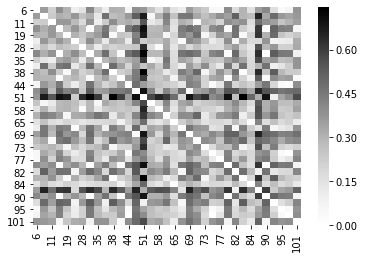

In [33]:
# plot heatmap
ax = sns.heatmap(dissimilarity.T, cmap="Greys")


# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90)

# save figure
plt.savefig('seabornPandas.png', dpi=1000)
plt.show()

# kmeans

In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics


In [35]:
clinski_harabaz_scores = []
cluster_num = range(2, 10)

for i in cluster_num:
    kmeans = KMeans(n_clusters = i, n_jobs = 4)
    predict = kmeans.fit_predict(dissimilarity)
    clinski_harabaz_scores.append(metrics.calinski_harabasz_score(dissimilarity, predict))

In [36]:
clinski_harabaz_scores

[21.089869147728706,
 18.40880916597051,
 20.81205315216534,
 23.07778323223786,
 26.89197662970608,
 29.51015467850364,
 36.38781886187271,
 36.54293149270431]

In [37]:
kmeans = KMeans(n_clusters = 3, n_jobs = 4)
labels_kmeans = kmeans.fit_predict(dissimilarity)

In [38]:
labels_kmeans

array([0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 1, 1, 0, 2, 0, 2, 2, 1, 1, 0, 2, 2,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1])

In [39]:
data_ten_minutes['labels_kmeans'] = labels_kmeans

# mean shift

In [40]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [41]:
meanShift = MeanShift(bandwidth=0.93)
labels_mean = meanShift.fit_predict(dissimilarity)

In [42]:
labels_mean

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [43]:
data_ten_minutes['labels_meanshift'] = labels_mean

# DBSCAN

In [44]:
from sklearn.cluster import DBSCAN

In [45]:
labels_dbscan = DBSCAN(eps = 0.36).fit_predict(dissimilarity)

In [46]:
labels_dbscan

array([ 2, -1, -1,  0,  1, -1, -1,  0, -1, -1,  1, -1,  2, -1, -1, -1, -1,
        1, -1, -1, -1, -1,  1,  2, -1,  0, -1,  1, -1, -1,  0, -1,  2,  2,
        0], dtype=int64)

In [47]:
data_ten_minutes['labels_dbscan'] = labels_dbscan + 1

# Gaussian 

In [48]:
from sklearn import mixture

In [49]:
labels_gaussian = mixture.GaussianMixture(n_components=3, covariance_type='full').fit(dissimilarity).predict(dissimilarity)

In [50]:
labels_gaussian

array([0, 1, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 2, 0, 1, 1,
       1, 0, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0, 2], dtype=int64)

In [51]:
data_ten_minutes['labels_gaussian'] = labels_gaussian

### 删除id 8 和34， 这两个id无原始label

In [52]:
labels =  [1,2,2,0,0,1,2,0,2,1,0,0,1,2,1,2,2,0,0,1,2,2,0,1,1,0,1,0,0,1,0,1,1,1,0]
 # 删除id = 8 id = 34 因为没有这两个id的label


data_ten_minutes['labels'] = labels
data_ten_minutes

,Id,0,1,2,3,4,5,6,7,8,...,139,140,141,142,143,labels_kmeans,labels_meanshift,labels_dbscan,labels_gaussian,labels
0,6,244.900000,246.611111,246.800000,246.700000,246.800000,246.300000,246.100000,246.400000,246.900000,...,248.2,247.800000,247.600000,248.500000,247.100000,0,0,3,0,1
1,9,244.600000,245.444444,246.000000,246.000000,245.600000,244.800000,242.400000,246.800000,246.900000,...,246.6,245.700000,244.444444,244.200000,245.400000,2,0,0,1,2
2,11,244.200000,243.722222,243.700000,244.700000,244.500000,243.500000,243.200000,244.900000,244.100000,...,246.0,246.333333,246.300000,246.300000,246.100000,2,0,0,1,2
3,13,241.000000,242.100000,243.300000,243.200000,244.000000,240.800000,241.500000,243.500000,243.400000,...,243.3,243.700000,243.700000,243.900000,242.200000,1,0,1,2,0
4,19,242.111111,244.125000,245.800000,246.888889,245.444444,245.200000,243.500000,246.400000,247.600000,...,244.6,244.812500,244.800000,246.500000,244.600000,1,0,2,1,0
6,27,244.400000,245.611111,246.200000,247.200000,246.800000,245.600000,245.700000,246.200000,247.100000,...,247.2,247.300000,247.800000,248.300000,246.400000,0,0,0,0,1
7,28,245.000000,245.500000,246.000000,246.600000,245.900000,246.100000,245.100000,246.500000,246.500000,...,247.0,246.800000,246.800000,247.700000,246.900000,2,0,0,1,2
8,30,240.700000,242.000000,243.600000,243.900000,244.000000,242.100000,241.200000,243.555556,243.700000,...,242.8,243.200000,243.400000,243.600000,242.100000,1,0,1,2,0
9,35,244.600000,244.888889,244.800000,244.600000,244.500000,243.600000,243.200000,245.000000,244.400000,...,246.3,246.000000,246.100000,246.000000,245.800000,2,0,0,1,2
10,37,245.000000,245.700000,246.000000,246.000000,245.900000,245.400000,245.100000,245.400000,245.700000,...,247.2,247.000000,247.300000,247.600000,246.222222,0,0,0,0,1


# plot 原始图

In [53]:
import matplotlib.pyplot as plt

from collections import OrderedDict

In [54]:
id_list

[6,
 9,
 11,
 13,
 19,
 27,
 28,
 30,
 35,
 37,
 38,
 42,
 44,
 48,
 51,
 56,
 58,
 60,
 65,
 67,
 69,
 71,
 73,
 74,
 77,
 80,
 82,
 83,
 84,
 86,
 90,
 94,
 95,
 97,
 101]

In [55]:
cur_idlist = id_list

In [56]:
cur_idlist

[6,
 9,
 11,
 13,
 19,
 27,
 28,
 30,
 35,
 37,
 38,
 42,
 44,
 48,
 51,
 56,
 58,
 60,
 65,
 67,
 69,
 71,
 73,
 74,
 77,
 80,
 82,
 83,
 84,
 86,
 90,
 94,
 95,
 97,
 101]

In [57]:
cur_idlist[5]

27

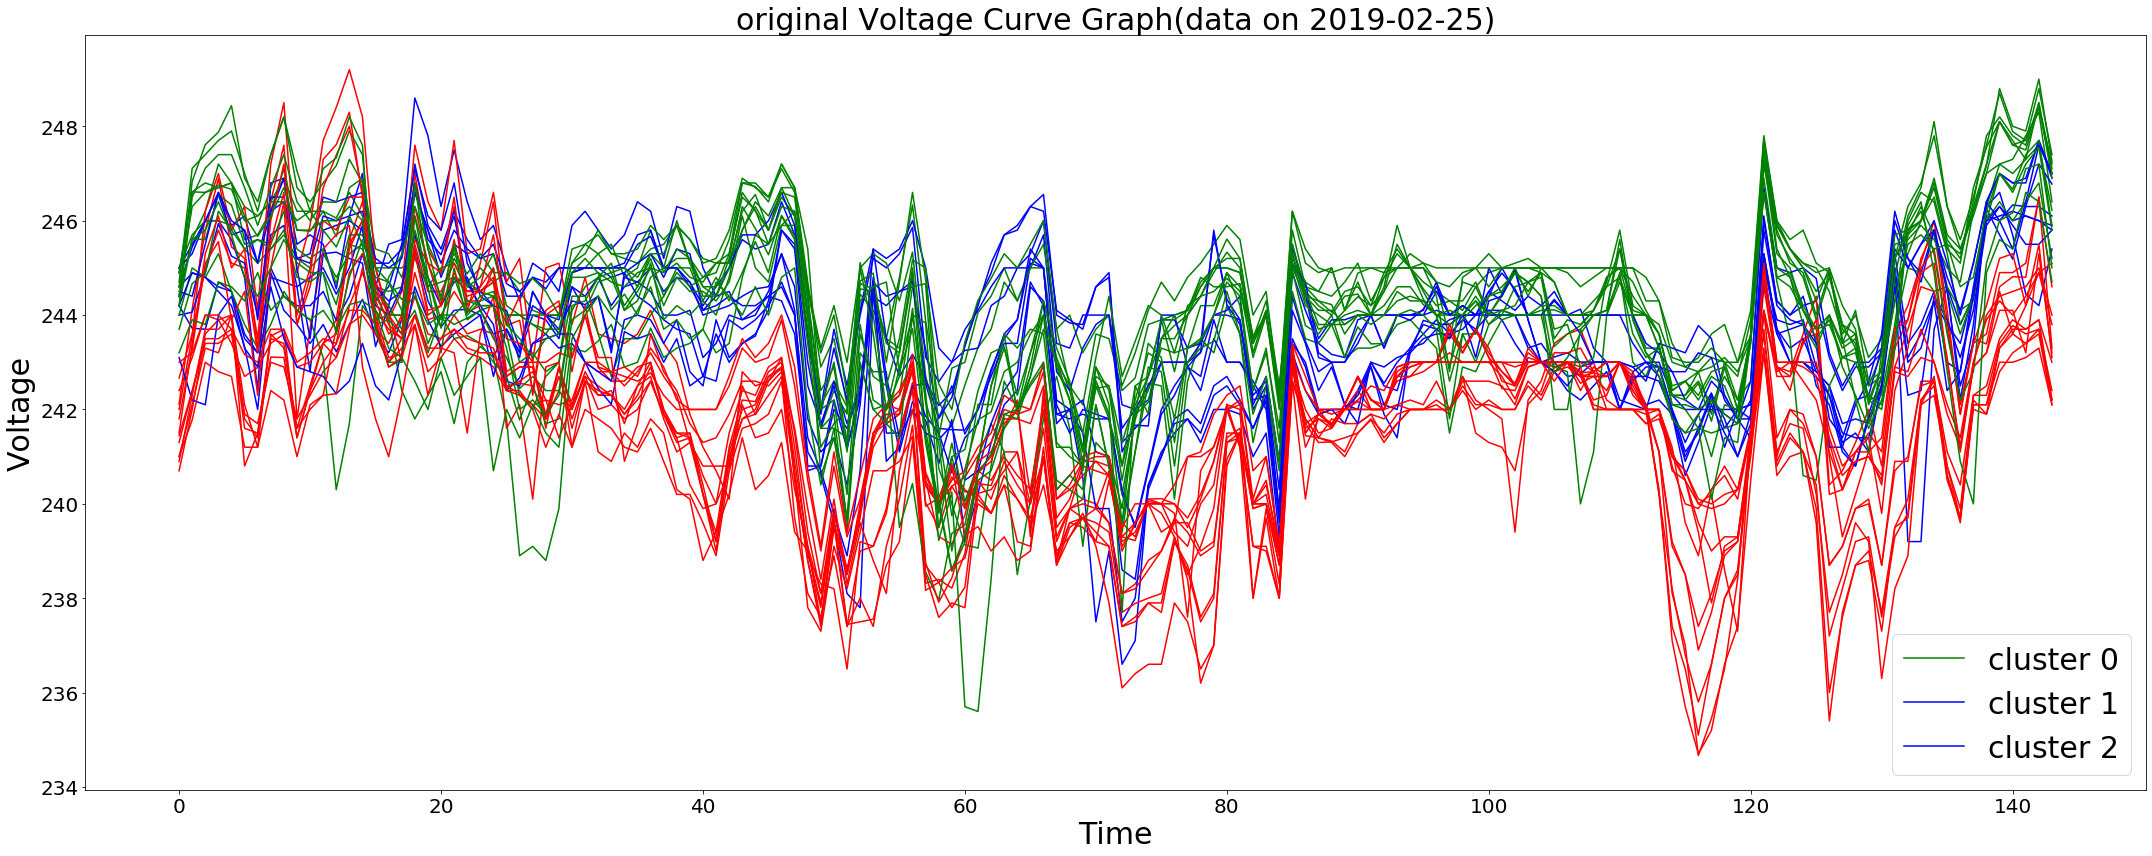

In [58]:
 # 删除8和34的id list

color_list = ['red','green','blue']
cluster_num = 3
x = range(144)
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(cur_idlist)):
    row = data_ten_minutes[data_ten_minutes['Id'] == cur_idlist[i]]
    idx = row['labels'].values[0]
    y =[] 
    for j in range(144):
        tem = row.iat[0,j+1]
        y.append(tem)
#     print(x, y)
    plt.plot(x,y,color = color_list[idx], label = 'cluster '  + str(idx))
    
plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc = 'lower right',fontsize = 30)
plt.title('original Voltage Curve Graph(data on 2019-02-25)', fontsize = 30)
plt.xlabel('Time', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)
plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()

# plot kmeans label

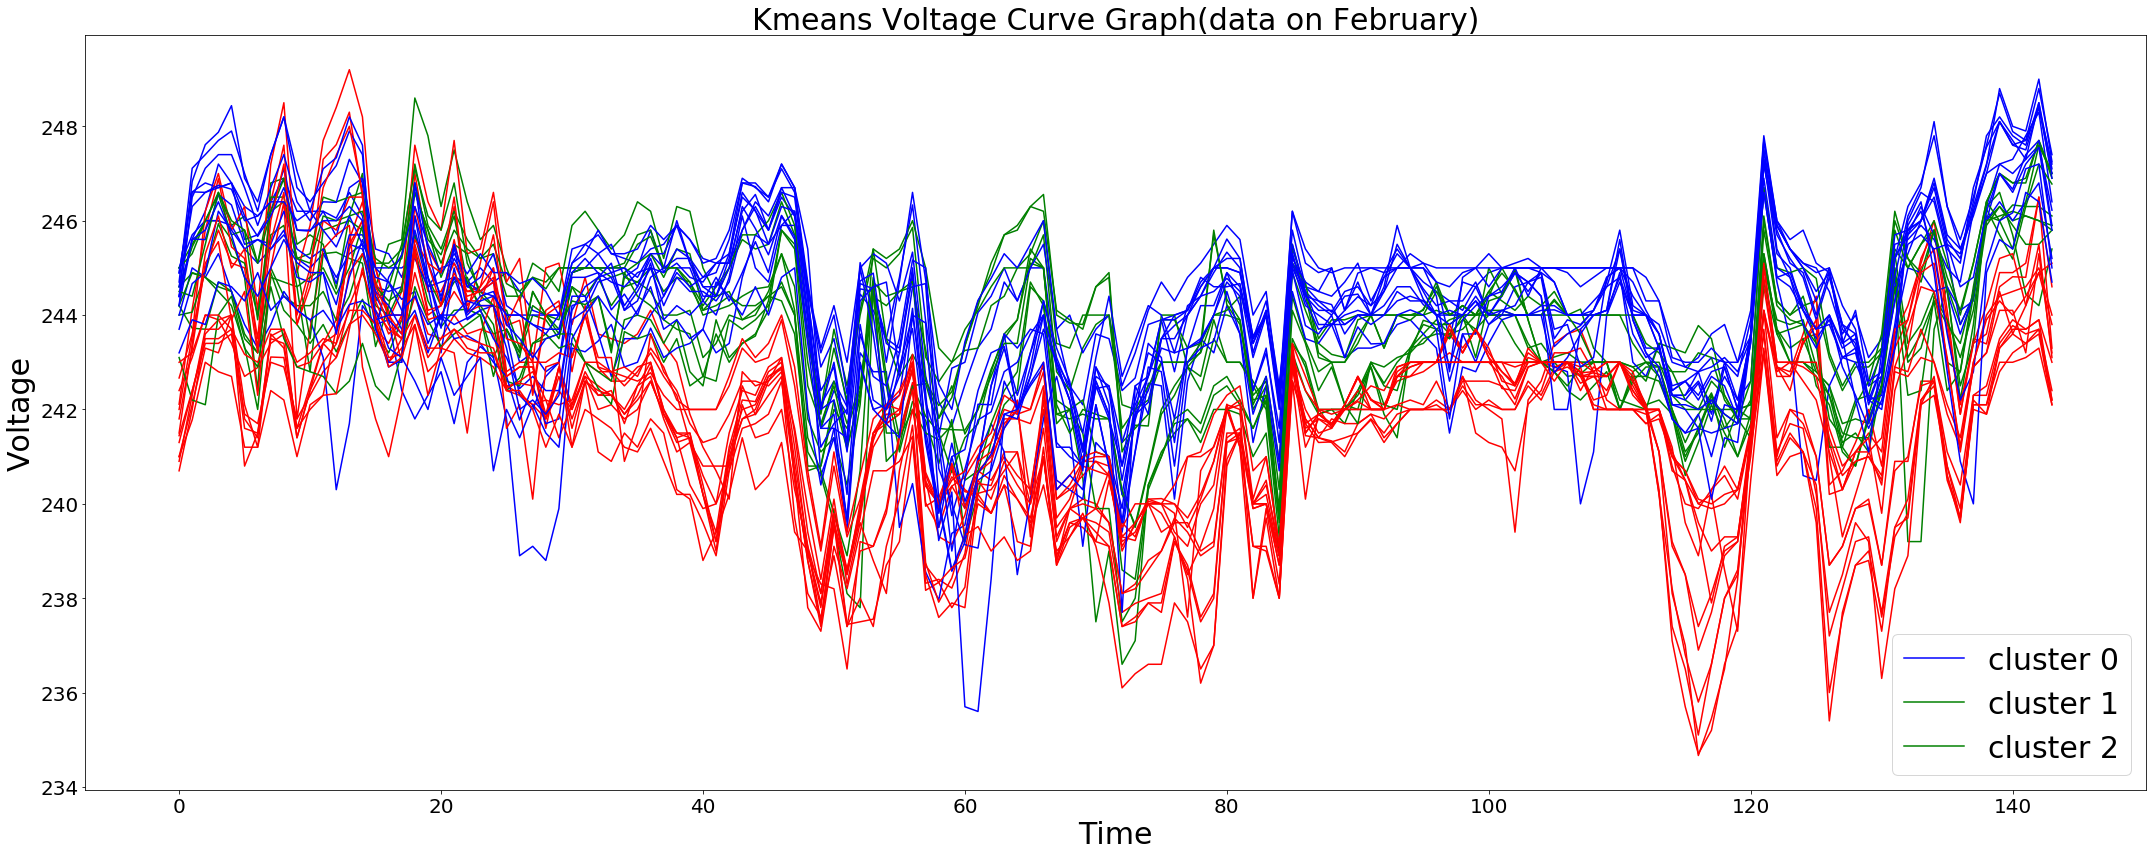

In [59]:
# 删除8和34的id list
color_list = ['blue','red','green']
cluster_num = 3
x = range(144)
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(cur_idlist)):
    row = data_ten_minutes[data_ten_minutes['Id'] == cur_idlist[i]]
    idx = row['labels_kmeans'].values[0]
    y =[] 
    for j in range(144):
        tem = row.iat[0,j+1]
        y.append(tem)
#     print(x, y)
    plt.plot(x,y,color = color_list[idx], label = 'cluster '  + str(idx))
    
plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc = 'lower right',fontsize = 30)
plt.title('Kmeans Voltage Curve Graph(data on February)', fontsize = 30)
plt.xlabel('Time', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)
plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()

# plot meanshift

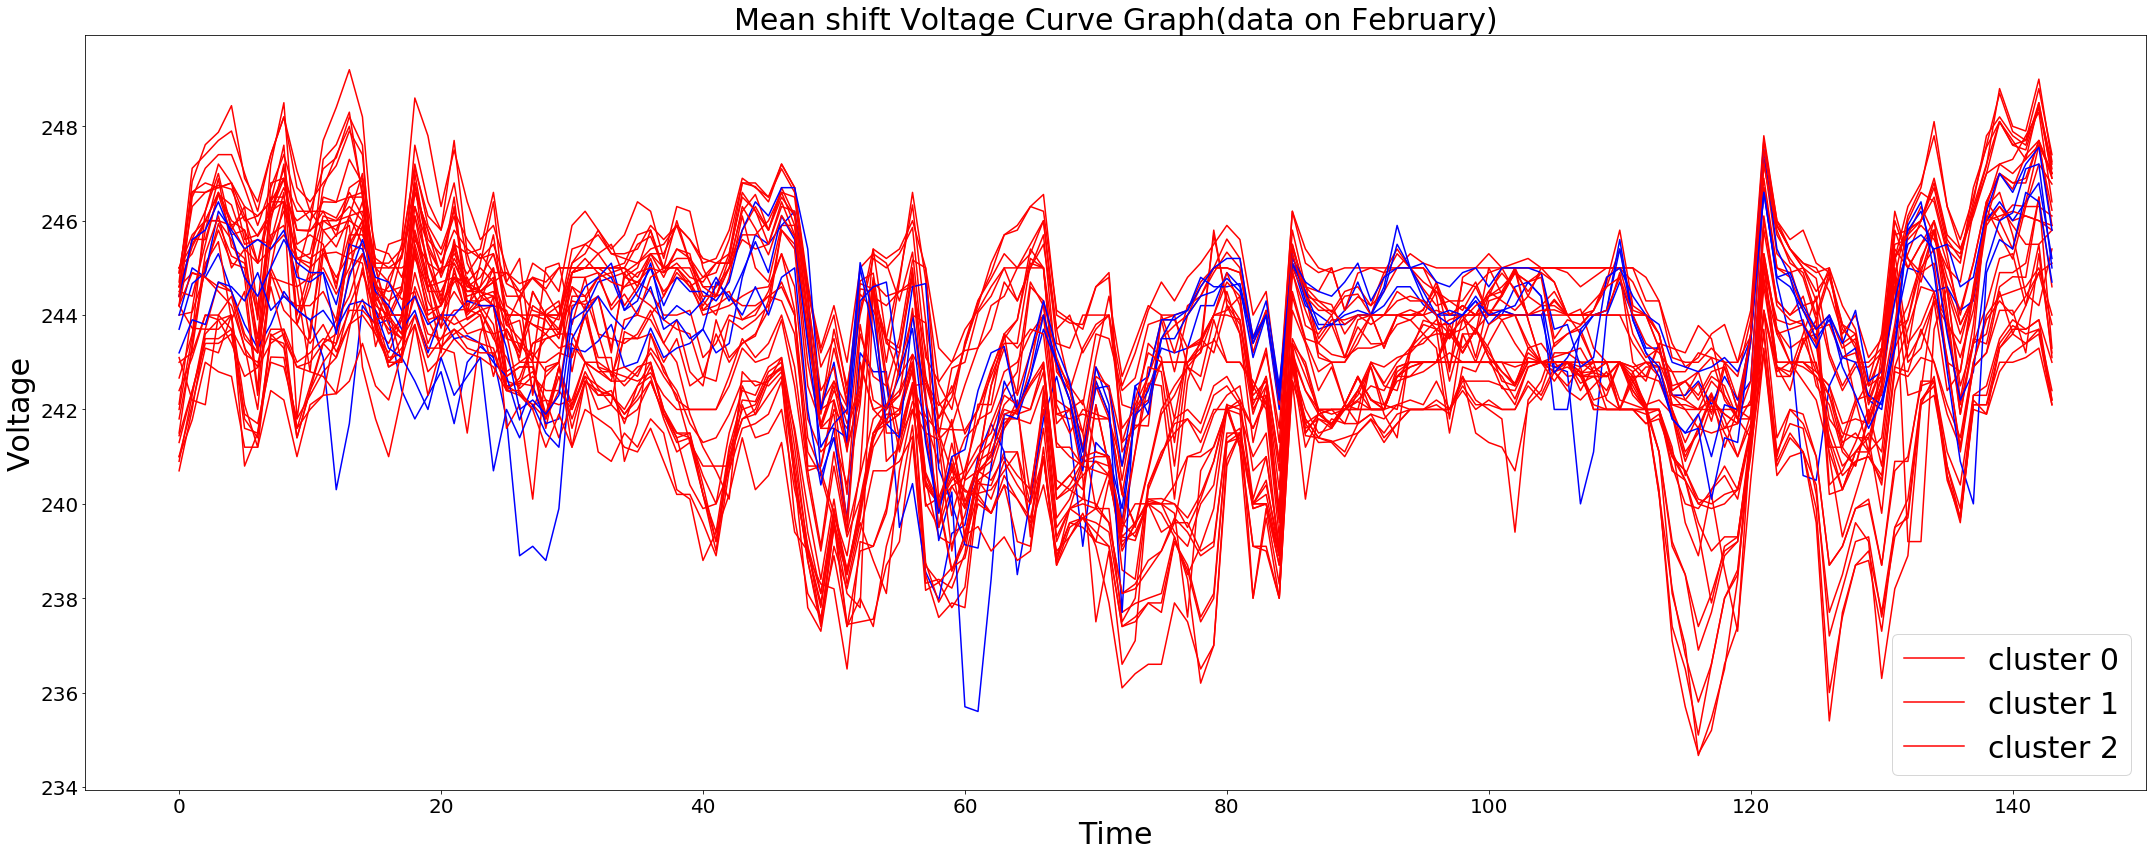

In [60]:
color_list = ['red','blue','green']
cluster_num = 3
x = range(144)
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(cur_idlist)):
    row = data_ten_minutes[data_ten_minutes['Id'] == cur_idlist[i]]
    idx = row['labels_meanshift'].values[0]
    y =[] 
    for j in range(144):
        tem = row.iat[0,j+1]
        y.append(tem)
#     print(x, y)
    plt.plot(x,y,color = color_list[idx], label = 'cluster '  + str(idx))
    
plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc = 'lower right',fontsize = 30)
plt.title('Mean shift Voltage Curve Graph(data on February)', fontsize = 30)
plt.xlabel('Time', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)
plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()

# plot DBSCAN

IndexError: list index out of range

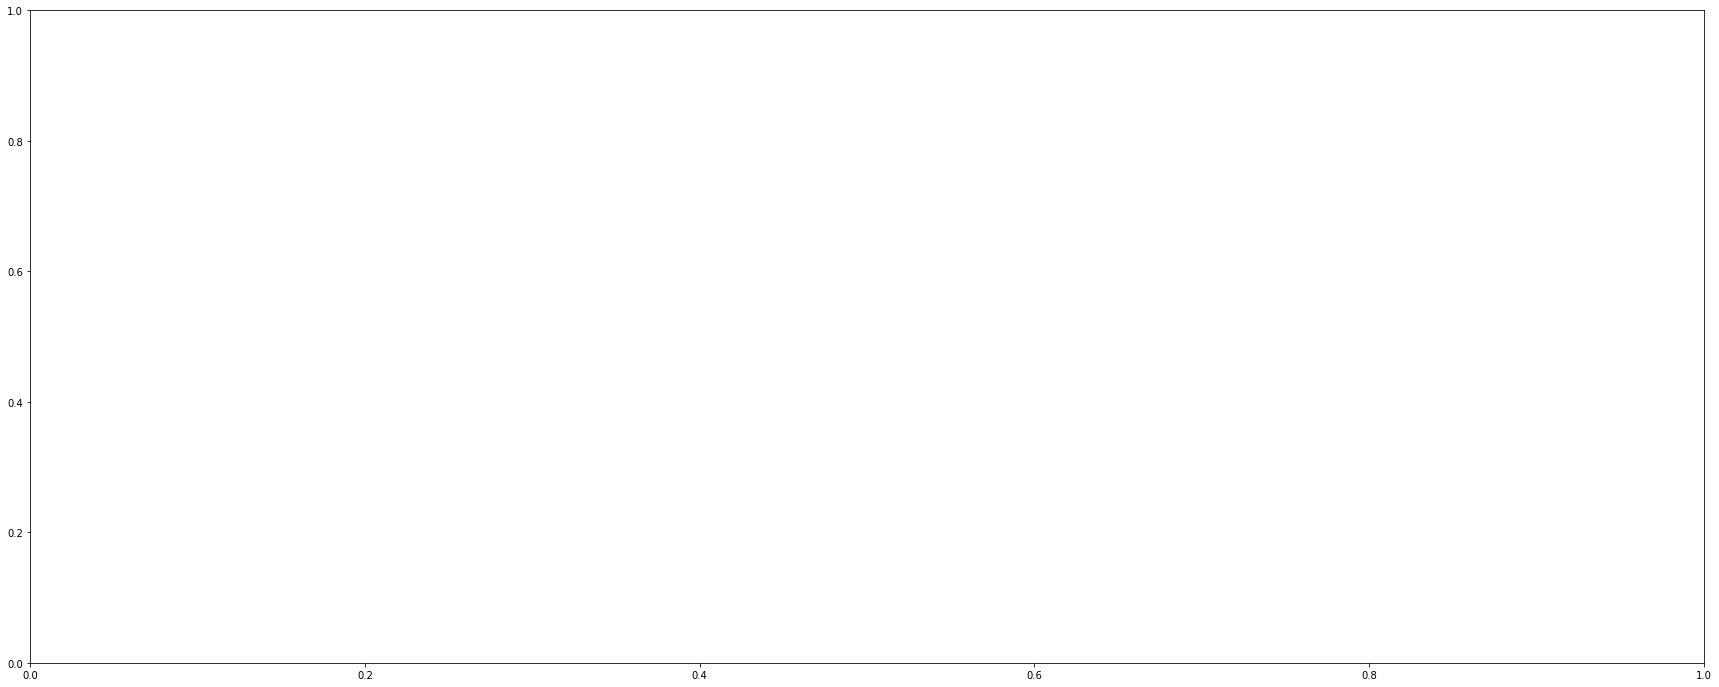

In [61]:
color_list = ['blue','green','red']
cluster_num = 3
x = range(144)
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(cur_idlist)):
    row = data_ten_minutes[data_ten_minutes['Id'] == cur_idlist[i]]
    idx = row['labels_dbscan'].values[0]
    y =[] 
    for j in range(144):
        tem = row.iat[0,j+1]
        y.append(tem)
#     print(x, y)
    plt.plot(x,y,color = color_list[idx], label = 'cluster '  + str(idx))

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc = 'lower right',fontsize = 30)

plt.title('DBSCAN Voltage Curve Graph(data on February)', fontsize = 30)
plt.xlabel('Time', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)
plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()



# plot Guassian

In [ ]:
color_list = ['green','red','blue']
cluster_num = 3
x = range(144)
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(cur_idlist)):
    row = data_ten_minutes[data_ten_minutes['Id'] == cur_idlist[i]]
    idx = row['labels_gaussian'].values[0]
    y =[] 
    for j in range(144):
        tem = row.iat[0,j+1]
        y.append(tem)
#     print(x, y)
    plt.plot(x,y,color = color_list[idx], label = 'cluster '  + str(idx))

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc = 'lower right',fontsize = 30)

plt.title('Guassian Voltage Curve Graph(data on February)', fontsize = 30)
plt.xlabel('Time', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)
plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()


# Confusion Matrix Kmeans

In [ ]:
from sklearn.metrics import confusion_matrix
y_actu = data_ten_minutes['labels']
y_pred = data_ten_minutes['labels_kmeans']
confusion_matrix(y_actu, y_pred)

In [ ]:
y_actu = pd.Series(data_ten_minutes['labels'], name='Actual')
y_pred = pd.Series(data_ten_minutes['labels_kmeans'], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

# Confusion Matrix Mean Shift

In [ ]:
y_actu = pd.Series(data_ten_minutes['labels'], name='Actual')
y_pred = pd.Series(data_ten_minutes['labels_meanshift'], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

# Confusion Matrix DBSCAN

In [ ]:
y_actu = pd.Series(data_ten_minutes['labels'], name='Actual')
y_pred = pd.Series(data_ten_minutes['labels_dbscan'], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

# Confusion Matrix Gaussian

In [ ]:
y_actu = pd.Series(data_ten_minutes['labels'], name='Actual')
y_pred = pd.Series(data_ten_minutes['labels_gaussian'], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

In [ ]:
color_list = ['blue','green','red']
cluster_num = 3
x = range(144)
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(3):   # 3 clusters, each polt 2 ids and one meandian
    row = data_ten_minutes[data_ten_minutes['labels_gaussian'] == i]
    row_1, row_2 = row[2:3], row[3:4]
    y1 =[] 
    for j in range(144):
        tem = row_1.iat[0,j+1]
        y1.append(tem)
#     print(y1)
    
    y2 =[] 
    for j in range(144):
        tem = row_2.iat[0,j+1]
        y2.append(tem)

    plt.plot(x,y1,color = color_list[i], label = 'cluster '  + str(i))
    plt.plot(x,y2,color = color_list[i], label = 'cluster '  + str(i))
    med = row.mean(axis = 0)[1: 145]
    plt.plot(x,med,color = color_list[i], ls = '--')
    
plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc = 'lower right',fontsize = 30)
plt.title('Gaussian Voltage Curve Graph(data on 2019-02-01)', fontsize = 30)
plt.xlabel('Time', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)
plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()

# Gaussian Heatmap

In [ ]:
heatmap_kmeans = list(labels_gaussian) 
heatmap_kmeans = heatmap_kmeans[:2] + heatmap_kmeans[3:12] + heatmap_kmeans[13:]
# print(heatmap_kmeans)

# 将每个id 与label 对应
dic = {}
for i in range(len(cur_idlist)):
    dic[cur_idlist[i]] = heatmap_kmeans[i]

# print(dic)

orders = []
for i in range(3):
    for j in range(len(dic)):
        if dic[cur_idlist[j]] == i:
            orders.append(cur_idlist[j])
# orders

heatmap_ten = tranpose_ten
heatmap_ten =  heatmap_ten.drop([8], axis=1)
heatmap_ten = heatmap_ten.drop([34], axis=1)

heatmap_ten = heatmap_ten[orders]
heatmap_corr = heatmap_ten.corr()

heat_dissimilarity = 1 - np.abs(heatmap_corr)
ax = sns.heatmap(heat_dissimilarity.T)

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(0)
    
ax.xaxis.set_ticks_position('top')
    

# save figure
plt.savefig('heatmap_guassian.png', dpi=1000)
plt.show()

# Kmeans Heatmap

In [ ]:
heatmap_kmeans = list(labels_kmeans) 
heatmap_kmeans = heatmap_kmeans[:2] + heatmap_kmeans[3:12] + heatmap_kmeans[13:]
# print(heatmap_kmeans)

# 将每个id 与label 对应
dic = {}
for i in range(len(cur_idlist)):
    dic[cur_idlist[i]] = heatmap_kmeans[i]

print(dic)

orders = []
for i in range(3):
    for j in range(len(dic)):
        if dic[cur_idlist[j]] == i:
            orders.append(cur_idlist[j])
# orders

In [ ]:
heatmap_ten = tranpose_ten
heatmap_ten =  heatmap_ten.drop([8], axis=1)
heatmap_ten = heatmap_ten.drop([34], axis=1)

heatmap_ten = heatmap_ten[orders]

In [ ]:
heatmap_corr = heatmap_ten.corr()

In [ ]:
heat_dissimilarity = 1 - np.abs(heatmap_corr)
ax = sns.heatmap(heat_dissimilarity.T)

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90)

# save figure
plt.savefig('heatmap_kmeans.png', dpi=100)
plt.show()